In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import cv2
import os
import numpy as np

zip_path = "/content/drive/My Drive/braintumor_dataset.zip"
dataset_path = "/content/braintumor_dataset"
training_path = "/content/braintumor_dataset/Training"
testing_path = "/content/braintumor_dataset/Testing"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_train = []
Y_train = []

image_size = 150

for folder in ['Training', 'Testing']:
    folder_path = os.path.join(dataset_path, folder)
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img,(image_size,image_size))
            if folder == 'Training':
                X_train.append(img)
                Y_train.append(subfolder)
            else:
                X_train.append(img)
                Y_train.append(subfolder)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
# Flatten and scale the image data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
model_svm = svm.SVC(kernel='linear', C=1, gamma='auto')
model_svm.fit(X_train, Y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [ ]:
y_pred = model_svm.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7947932618683001


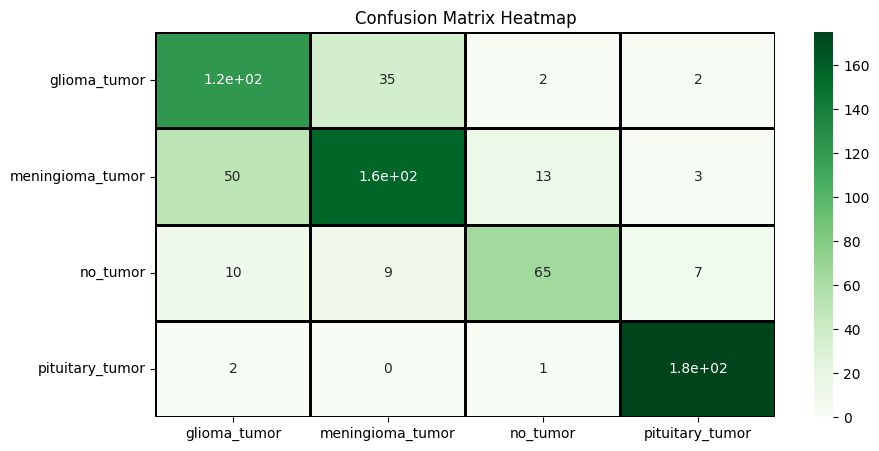

In [ ]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)
# Plot confusion matrix as heatmap
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.heatmap(cm,ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap="Greens",linewidths=1,linecolor="black")
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

                  precision    recall  f1-score   support

    glioma_tumor       0.66      0.76      0.71       162
meningioma_tumor       0.78      0.70      0.74       222
        no_tumor       0.80      0.71      0.76        91
 pituitary_tumor       0.94      0.98      0.96       178

        accuracy                           0.79       653
       macro avg       0.80      0.79      0.79       653
    weighted avg       0.80      0.79      0.79       653

